<a href="https://colab.research.google.com/github/AnthonyTennis/lab-6-Data301/blob/main/Copy_of_DATA_301_Lab_6A_Anthony_Teciorowski%2C_Michael_Cassetti%2C_Varun_Kolli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CityBikes Rest API

This section asks you to fetch JSON data from the [CityBikes REST API](https://api.citybik.es/v2/) to answer some questions about bike share programs.

Please be mindful not to send requests to the server more often than necessary. In particular, make sure you separate code that requests data from the server into a separate cell so that you do not have to repeatedly request data from the server. You will lose points if your requests are not separated into their own cell.

# Question 1

Find all cities with bike share programs in the United States (country code "US"), along with their network ID (for example, "bay-wheels"). How many cities in the U.S. have bike share programs (at least that are in this API)?

In [ ]:
import requests

# Make a request to the CityBikes API to get the list of networks
response = requests.get('https://api.citybik.es/v2/networks')

# Get the JSON content from the response
networks_data = response.json()

In [ ]:
# Initialize a list to store the cities with bike share programs in the US
us_cities = []

# Loop through the networks and check if the country code is "US"
for network in networks_data["networks"]:
    if network["location"]["country"] == "US":
        city = network["location"]["city"]
        network_id = network["id"]
        us_cities.append((city, network_id))
        print(city, network_id)

# Count the number of cities with bike share programs in the US
num_cities = len(us_cities)
print(f"\nThere are {num_cities} cities with bike share programs in the US.")

Aspen, CO we-cycle
Ann Arbor, MI arborbike
Austin, TX austin
Chattanooga, TN bike-chattanooga
Portland, OR biketown
San Ramon, CA britebikes
Boise, ID boise-greenbike
Boulder, CO boulder
Santa Monica, CA breeze-bike-share
Fort Lauderdale, FL broward
Milwaukee, WI bublr-bikes
Buffalo, NY reddy-bike-share
Washington, DC capital-bikeshare
Charlotte, NC charlotte
Cincinnati, OH cincy-red-bike
New York, NY citi-bike-nyc
Tampa, FL coast-bike-share
Columbus, OH cogo
Denver, CO denver
Chicago, IL divvy
El Paso, TX elpaso
Fort Worth, TX fortworth
Fargo, ND greatrides
Salt Lake City greenbikeslc
Phoenix, AZ grid-bike-share
Omaha, NE omaha
Houston, TX houston
Boston, MA blue-bikes
Philadelphia, PA indego
Indianapolis, IN indiana-pacers-bikeshare
Orlando, FL juice-bike-share
Kansas City, MO kansascity
Dayton, OH linkdayton
Madison, WI madison
Los Angeles, CA metro-bike-share
Ketchum / Sun Valley, ID mountain-rides-bike-share
Minneapolis, MN nice-ride
San Antonio, TX sanantonio
University of South 

# Question 2

Construct a `DataFrame` containing data about all bike stations in all networks in the United States. Save this `DataFrame` to disk using `.to_csv()`. (You will need it in Part B of this lab.)

Use this `DataFrame` to determine the total number of bicycles in bike share programs across the United States? You may assume that the number of bikes at a station is the number of empty spaces, plus the number of available bikes.

In [ ]:
# Initialize an empty list to store station data
station_data = []

# Loop through the networks and check if the country code is "US"
for network in networks_data["networks"]:
    if network["location"]["country"] == "US":
        network_name = network["name"]
        city = network["location"]["city"]
        network_id = network["id"]
        print(f"Getting station data for {network_name} in {city}...")
        
        # Make a request to the CityBikes API to get station data for this network
        response = requests.get(f"https://api.citybik.es/v2/networks/{network_id}")
        
        # Get the JSON content from the response
        stations_data = response.json()
        
        # Loop through the stations and get the total number of bikes
        for station in stations_data["network"]["stations"]:
            latitude = station["latitude"]
            longitude = station["longitude"]
            empty_slots = station["empty_slots"]
            free_bikes = station["free_bikes"]
            total_bikes = empty_slots + free_bikes
            station_data.append({
                "network_name": network_name,
                "city": city,
                "latitude": latitude,
                "longitude": longitude,
                "total_bikes": total_bikes
            })

Getting station data for WE-cycle in Aspen, CO...
Getting station data for ArborBike in Ann Arbor, MI...
Getting station data for Austin B-cycle in Austin, TX...
Getting station data for Bike Chattanooga in Chattanooga, TN...
Getting station data for BIKETOWN in Portland, OR...
Getting station data for BRiteBikes in San Ramon, CA...
Getting station data for Boise GreenBike in Boise, ID...
Getting station data for Boulder B-cycle in Boulder, CO...
Getting station data for Breeze Bike Share in Santa Monica, CA...
Getting station data for Broward B-cycle in Fort Lauderdale, FL...
Getting station data for Bublr Bikes in Milwaukee, WI...
Getting station data for Reddy Bike Share in Buffalo, NY...
Getting station data for Capital BikeShare in Washington, DC...
Getting station data for Charlotte B-cycle in Charlotte, NC...
Getting station data for Cincy Red Bike in Cincinnati, OH...
Getting station data for Citi Bike in New York, NY...
Getting station data for Coast Bike Share in Tampa, FL...

In [ ]:
import pandas as pd
import os
from google.colab import drive

# Create a DataFrame from the station data
stations_df = pd.DataFrame(station_data)

# Save the DataFrame to disk using .to_csv()
drive.mount("/content/drive")
path = "/content/drive/My Drive/stations_data.csv"
with open(path, "w", encoding = "utf-8-sig") as f:
  stations_df.to_csv(f)

# Calculate the total number of bikes across all stations in the US
total_bikes = stations_df["total_bikes"].sum()
print(f"\nThe total number of bikes in bike share programs across the US is {total_bikes}.")


/content
['.config', 'stations_data.csv', 'sample_data']
Mounted at /content/drive
['.config', 'drive', 'stations_data.csv', 'sample_data']

The total number of bikes in bike share programs across the US is 145572.


# Question 3

You have just finished touring Coit Tower in San Francisco, which is located at latitude 37.802747 and longitude -122.405861. Using your `DataFrame` from Question 2, find the nearest bike station with an available bike, based on taxicab distance (a.k.a. Manhattan distance).

_Hint:_ You can check your answer using Google Maps!

In [ ]:
import pandas as pd

# Load the stations DataFrame from disk
stations_df = pd.read_csv("stations_data.csv")
display(stations_df)
# Calculate the taxicab distance between each station and Coit Tower
stations_df["distance"] = (abs(stations_df["latitude"] - 37.802747) +
                           abs(stations_df["longitude"] + 122.405861))

# Filter the DataFrame to only include stations with available bikes
available_stations = stations_df[stations_df["total_bikes"] > 0]

# Sort the DataFrame by distance and select the closest station
nearest_station = available_stations.sort_values("distance").iloc[0]

print(f"The nearest bike station with an available bike to Coit Tower is located at:\n{nearest_station['network_name']} in {nearest_station['city']}\nLatitude: {nearest_station['latitude']}\nLongitude: {nearest_station['longitude']}")


,network_name,city,latitude,longitude,total_bikes
0,WE-cycle,"Aspen, CO",39.364081,-107.034000,13
1,WE-cycle,"Aspen, CO",39.387865,-107.083800,7
2,WE-cycle,"Aspen, CO",39.386449,-107.083000,7
3,WE-cycle,"Aspen, CO",39.392904,-107.089598,11
4,WE-cycle,"Aspen, CO",39.399257,-107.090126,7
...,...,...,...,...,...
8274,Spokies BCycle,"Oklahoma, OK",35.462090,-97.517900,0
8275,Spokies BCycle,"Oklahoma, OK",35.459880,-97.516350,0
8276,Spokies BCycle,"Oklahoma, OK",35.458990,-97.516300,0
8277,Spokies BCycle,"Oklahoma, OK",35.531130,-97.485780,0


The nearest bike station with an available bike to Coit Tower is located at:
Bay Wheels in San Francisco Bay Area, CA
Latitude: 37.80477
Longitude: -122.403234


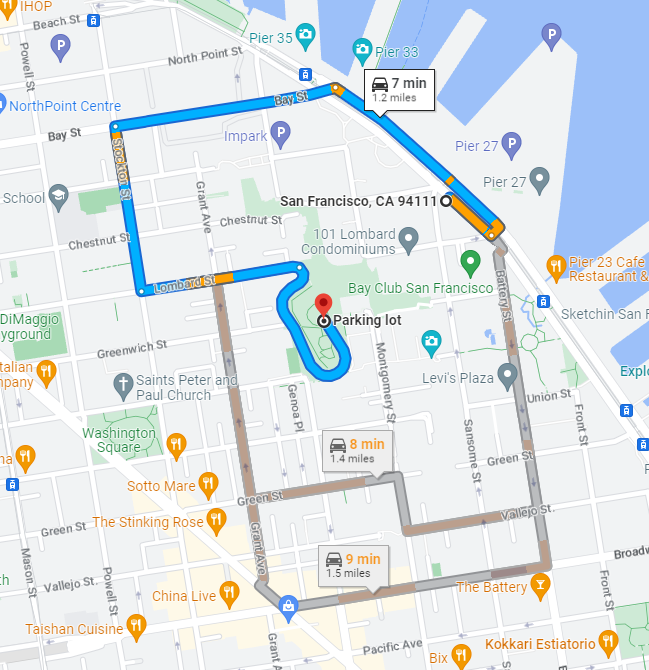

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 6A - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.